# UBER TRIPS ANALYSIS SEP 2014 

## PROBLEM DESCRIPTION

Q) Analyze the dataset "Uber Pickups in the New York City - July 2014"

Dataset acquired from Kaggle: https://www.kaggle.com/code/holdmykaggle/uber-data-analysis/data?select=uber-raw-data-sep14.csv

Dataset Name: uber-raw-data-sep14.csv

If the dataset is not present in the root directory of this notebook, please download it from the kaggle link above

### Details of the dataset:

The dataset contains information about the Datetime, Latitude, Longitude and Base of each uber ride that happened in the month of July 2014 at New York City, USA
- Date/Time : The date and time of the Uber pickup
- Lat : The latitude of the Uber pickup
- Lon : The longitude of the Uber pickup
- Base : The TLC base company code affiliated with the Uber pickup

The Base codes are for the following Uber bases:

- B02512 : Unter
- B02598 : Hinter
- B02617 : Weiter
- B02682 : Schmecken
- B02764 : Danach-NY

## Steps to follow

1. Import the dataset 
2. Read the dataset and understand its properties 
3. Explore the properties of the dataset
4. Visualize the data and generate some insights 

# 1. Import the dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
uber = pd.read_csv("uber-raw-data-sep14.csv")
uber.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [3]:
uber.tail()

,Date/Time,Lat,Lon,Base
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764


In [4]:
# Shape of the dataset 

uber.shape

(1028136, 4)

In [5]:
# Basic information about the dataset 

uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [6]:
uber["Date/Time"] # This dataset is stored in the format of MM/DD/YYYY HH:MM:SS 

0            9/1/2014 0:01:00
1            9/1/2014 0:01:00
2            9/1/2014 0:03:00
3            9/1/2014 0:06:00
4            9/1/2014 0:11:00
                  ...        
1028131    9/30/2014 22:57:00
1028132    9/30/2014 22:57:00
1028133    9/30/2014 22:58:00
1028134    9/30/2014 22:58:00
1028135    9/30/2014 22:58:00
Name: Date/Time, Length: 1028136, dtype: object

In [7]:
uber.Base

0          B02512
1          B02512
2          B02512
3          B02512
4          B02512
            ...  
1028131    B02764
1028132    B02764
1028133    B02764
1028134    B02764
1028135    B02764
Name: Base, Length: 1028136, dtype: object

In [8]:
# Let us find if there are any missing values

uber.isnull().sum() # There are no any missing values. 

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

#### The date/time column is stored as object. But it should be stored as date/time format

### Let us break the Date/time column into data time data type 

In [9]:
# Let us convert the Date/time column from string to datetime format 

uber["Date/Time"] = pd.to_datetime(uber["Date/Time"])

In [10]:
uber["Date/Time"]

0         2014-09-01 00:01:00
1         2014-09-01 00:01:00
2         2014-09-01 00:03:00
3         2014-09-01 00:06:00
4         2014-09-01 00:11:00
                  ...        
1028131   2014-09-30 22:57:00
1028132   2014-09-30 22:57:00
1028133   2014-09-30 22:58:00
1028134   2014-09-30 22:58:00
1028135   2014-09-30 22:58:00
Name: Date/Time, Length: 1028136, dtype: datetime64[ns]

In [13]:
# Let us create Day, hour and weekday columns from the Date/time column 

uber["Day"] = uber["Date/Time"].apply(lambda x:x.day)
uber["Hour"] = uber["Date/Time"].apply(lambda x:x.hour)
uber["Weekday"] = uber["Date/Time"].apply(lambda x:x.weekday())

In [14]:
uber.head()

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


## Checking density of rides according to days, hours and weekdays

Text(0, 0.5, 'Density of rides')

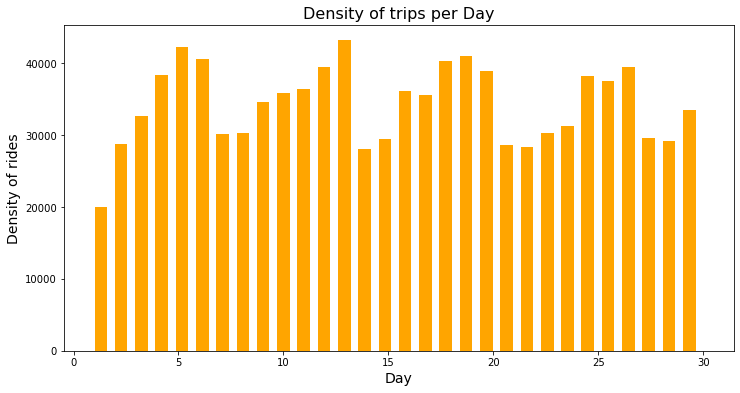

In [20]:
#Visualize the Density of rides per Day of month
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber.Day, width= 0.6, bins= 30, color = "orange")
plt.title("Density of trips per Day", fontsize=16)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

#### From the above plot, it is evident that the highest number of rides happen during the weekdays (Monday to Friday) and the weekends (Saturday and sunday) have a lesser number of rides as compared to the weekdays. 

Text(0, 0.5, 'Density of rides')

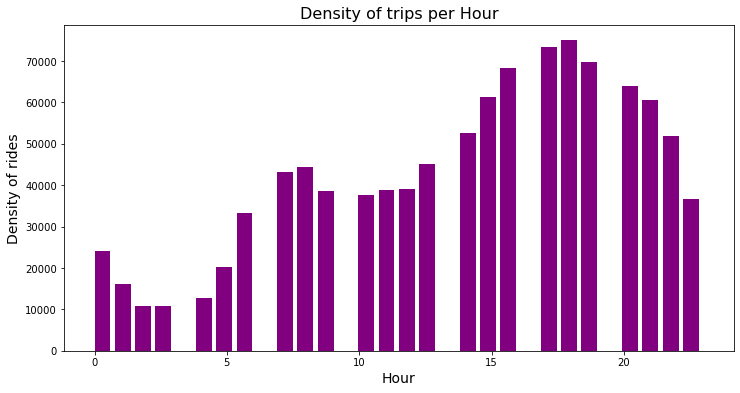

In [21]:
#Visualize the Density of rides per hour

fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber.Hour, width= 0.6, bins= 30, color = "purple")
plt.title("Density of trips per Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

#### The rides per hour are high from 1 pm to 4 pm. Again it increases starting from 5 am to 8 am.

Text(0, 0.5, 'Density of rides')

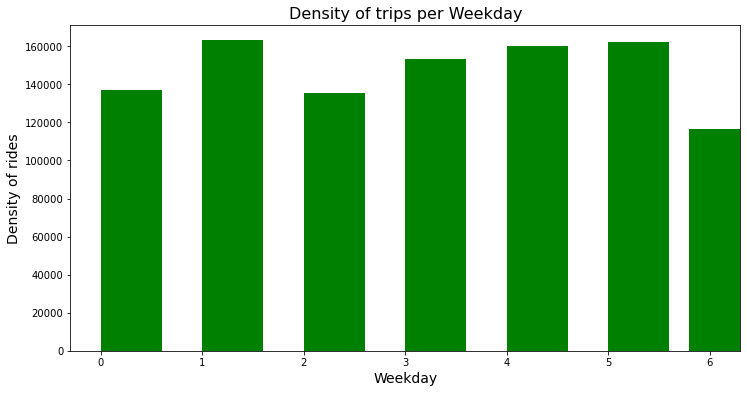

In [22]:
#Visualize the Density of rides per Weekday 
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber.Weekday, width= 0.6, bins= 30, color = "green")
plt.title("Density of trips per Weekday", fontsize=16)
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

#### Mondays are the busiest in the month of September. Saturday is the day with least number of rides. 

Text(0, 0.5, 'Latitude')

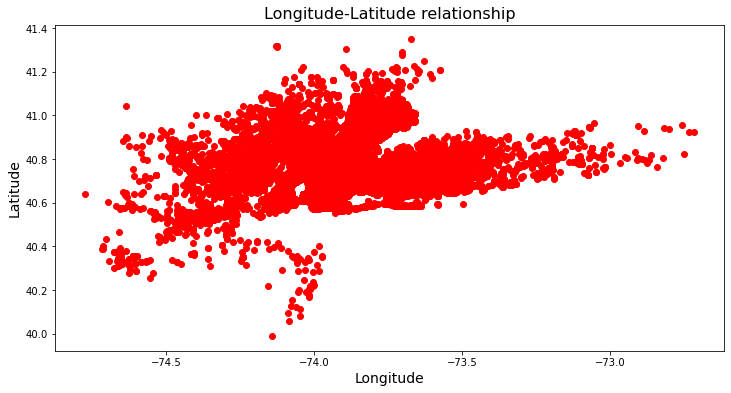

In [46]:
# Visualize the density of rides per location 

fig,ax = plt.subplots(figsize = (12,6))
x= uber.Lon
y= uber.Lat
plt.scatter(x, y, color= "red")
plt.title("Longitude-Latitude relationship", fontsize=16)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

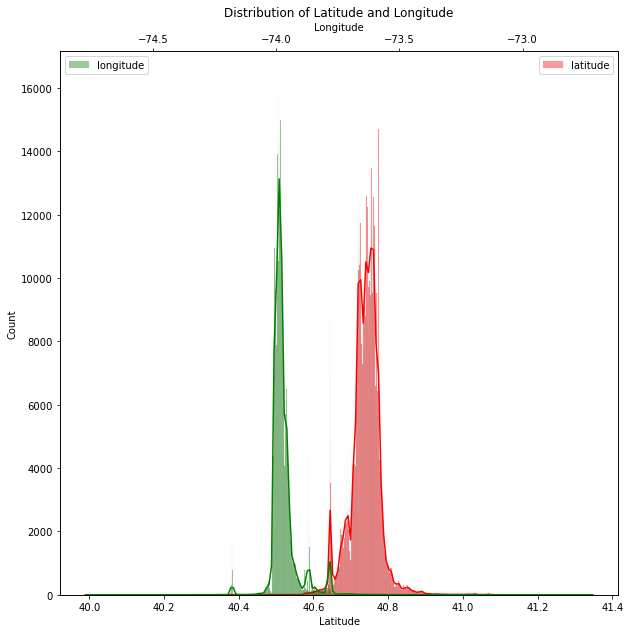

In [48]:
# Distribution of latitude and longitude

plt.figure(figsize=(10,10))
sns.histplot(uber['Lat'], bins='auto',kde=True,color='r',alpha=0.4,label = 'latitude')
plt.legend(loc='upper right')
plt.xlabel('Latitude')
plt.twiny()
sns.histplot(uber['Lon'], bins='auto',kde=True,color='g',alpha=0.4,label = 'longitude')
_=plt.legend(loc='upper left')
_=plt.xlabel('Longitude')
_=plt.title('Distribution of Latitude and Longitude')

#### Most latitudes are around 40.25, and longitudes around 40.75. This is true as the dataset comprises information only around New York City. This also indicates that most rides happen around (lat,lon) = (40.25,40.75)

## Which was the day with maximum number of rides? 

In [37]:
Number_of_rides_per_day = uber.groupby("Day").sum()
Number_of_rides_per_day

,Lat,Lon,Hour,Weekday
Day,,,,
1,8.130680e+05,-1.476222e+06,272829,0
2,1.174557e+06,-2.132513e+06,397752,28831
3,1.329397e+06,-2.413779e+06,466924,65262
4,1.562823e+06,-2.837594e+06,559806,115080
5,1.724077e+06,-3.130510e+06,627377,169276
6,1.650681e+06,-2.997416e+06,596263,202600
7,1.227515e+06,-2.228913e+06,390088,180804
8,1.236883e+06,-2.245750e+06,415344,0
9,1.408017e+06,-2.556619e+06,489128,34560


In [36]:
Number_of_rides_per_day.sort_values(by = "Weekday", ascending=False)

,Lat,Lon,Hour,Weekday
Day,,,,
13,1.760051e+06,-3.196072e+06,632540,216025
6,1.650681e+06,-2.997416e+06,596263,202600
27,1.607828e+06,-2.919535e+06,578259,197340
20,1.583221e+06,-2.874871e+06,565166,194320
7,1.227515e+06,-2.228913e+06,390088,180804
28,1.208026e+06,-2.193516e+06,365883,177936
21,1.165830e+06,-2.116909e+06,337321,171720
5,1.724077e+06,-3.130510e+06,627377,169276
14,1.145539e+06,-2.080096e+06,355814,168732


#### September 13th was the day with highest number of rides

## Which hour in the day had the highest number of rides on September?

In [39]:
Hourly_rides = uber.groupby("Hour").sum()
Hourly_rides

,Lat,Lon,Day,Weekday
Hour,,,,
0,9.830134e+05,-1.785292e+06,391856,103256
1,6.560825e+05,-1.191587e+06,264429,71068
2,4.359444e+05,-7.916976e+05,175054,45814
3,4.395123e+05,-7.980949e+05,173587,36098
4,5.162953e+05,-9.374843e+05,200766,34007
5,8.253542e+05,-1.498606e+06,322135,48606
6,1.356939e+06,-2.463573e+06,531572,76851
7,1.764753e+06,-3.204021e+06,692547,101392
8,1.812133e+06,-3.290056e+06,691275,109527


In [40]:
Hourly_rides.sort_values(by = "Weekday", ascending=False)

,Lat,Lon,Day,Weekday
Hour,,,,
18,3.057128e+06,-5.551000e+06,1163161,219057
17,2.989309e+06,-5.427738e+06,1131477,210894
19,2.837813e+06,-5.152969e+06,1075044,205256
16,2.779542e+06,-5.046743e+06,1049514,198256
20,2.606720e+06,-4.733226e+06,986025,184979
21,2.468937e+06,-4.483137e+06,943797,182771
15,2.494138e+06,-4.528539e+06,939784,180329
22,2.110786e+06,-3.833013e+06,799832,166294
14,2.144630e+06,-3.893933e+06,810688,157991


#### The highest number of rides occur during 5 pm that is 18 according to the standard world time format. 
#### Right from 5 pm to 7pm there are more than 200,000 rides happening 

## Which weekday has the highest number of rides? 

In [42]:
Weekday_rides = uber.groupby("Weekday").sum()
Weekday_rides

,Lat,Lon,Day,Hour
Weekday,,,,
0,5.593009e+06,-1.015492e+07,2174344,1870002
1,6.650165e+06,-1.207462e+07,2646372,2273178
2,5.515188e+06,-1.001400e+07,1812244,1924172
3,6.244606e+06,-1.133839e+07,2234276,2214587
4,6.533800e+06,-1.186383e+07,2440502,2385578
5,6.601781e+06,-1.198789e+07,2647701,2372228
6,4.746911e+06,-8.619434e+06,2036034,1449106


In [43]:
Weekday_rides.sort_values(by = "Hour", ascending = False)

,Lat,Lon,Day,Hour
Weekday,,,,
4,6.533800e+06,-1.186383e+07,2440502,2385578
5,6.601781e+06,-1.198789e+07,2647701,2372228
1,6.650165e+06,-1.207462e+07,2646372,2273178
3,6.244606e+06,-1.133839e+07,2234276,2214587
2,5.515188e+06,-1.001400e+07,1812244,1924172
0,5.593009e+06,-1.015492e+07,2174344,1870002
6,4.746911e+06,-8.619434e+06,2036034,1449106


#### The fourth weekday has the highest number of rides compared to any other weekdays. 

## Which was the base where most number of Uber rides origninated from?  

In [44]:
uber.Base.value_counts()

B02617    377695
B02598    240600
B02682    197138
B02764    178333
B02512     34370
Name: Base, dtype: int64

#### Weiter (B02617) is the base where the most number of Uber rides originated

Text(0, 0.5, 'Density of rides')

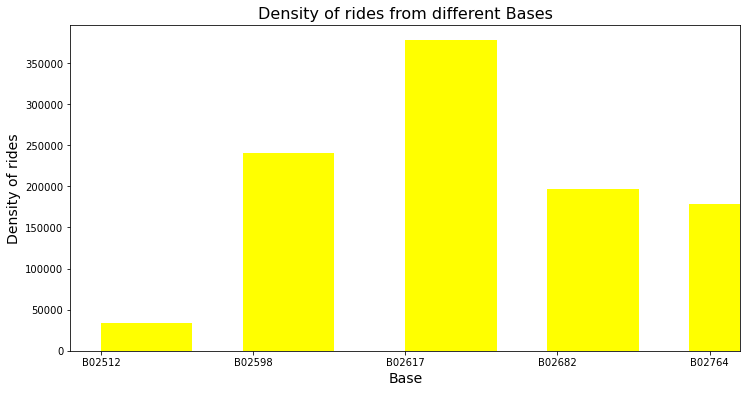

In [49]:
## Visualize the density of rides from different bases 

#Visualize the Density of rides per Weekday 
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber.Base, width= 0.6, bins= 30, color = "yellow")
plt.title("Density of rides from different Bases", fontsize=16)
plt.xlabel("Base", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

## Which latitude and longitude has the highest daily rides in a day

In [52]:
uber.groupby(["Lat", "Lon"]).sum().sort_values(by = "Day", ascending= False)

Day   Hour  Weekday
Lat     Lon                            
40.6448 -73.7819  10364  11019     2089
        -73.7820  10215  10591     1860
40.6447 -73.7821   7745   7552     1425
40.7685 -73.8625   7351   6787     1303
40.6448 -73.7818   6966   7379     1305
...                 ...    ...      ...
40.7955 -73.9697      1     10        0
40.7483 -74.0245      1     13        0
40.7665 -73.8740      1     12        0
40.6451 -73.7815      1     16        0
40.7028 -73.9161      1     14        0

[301887 rows x 3 columns]

#### The latitudes and longitudes of 40.6448 to -73.7819 and -73.7820 has the highest number of daily rides
#### The same latitude and longitude has the highest number of hourly and weekly rides too. 
#### These locations are mostly around the terminals of John.F.Kennedy international airport

In [ ]:
## Which base has the highest number of daily, hourly and weekly rides 

In [57]:
uber.groupby(["Base"]).sum().sort_values(by = "Day", ascending = False)

,Lat,Lon,Day,Hour,Weekday
Base,,,,,
B02617,1.538701e+07,-2.793887e+07,5724002,5328577,1113540
B02598,9.801700e+06,-1.779761e+07,3672159,3403192,709350
B02764,7.265121e+06,-1.319128e+07,3086315,2526356,540694
B02682,8.031252e+06,-1.458276e+07,3013640,2737433,581899
B02512,1.400378e+06,-2.542555e+06,495357,493293,99318


#### The Weiter base has the highest number of weekly,daily and hourly rides in the month of September